Overall starts of the seaason, team leverl stats and player level stats.

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mpl_colors
import warnings
from tqdm import tqdm
import math

In [2]:
# from kaggle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

palette = [
    '#2E765E', '#1d4a60', '#5DD9FB', '#568f8b', '#B6E5D8', '#cd7e59', '#BE0C3D', '#ddb247', '#d15252',
    '#b4d2b1', '#7fc8f8', '#2e294e', '#545454', '#008000', '#0c0f0a', '#2ec4b6', '#ff9f1c', '#086788',
    '#c1121f', '#540b0e', '#02c39a', '#cd7e59', '#BE0C3D', '#023e7d', '#5a189a', '#b4d2b1',
]
palette_rgb = [hex_to_rgb(x) for x in palette]
cmap = mpl_colors.ListedColormap(palette_rgb)
colors = cmap.colors
bg_color = '#EFEAE0'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params
)
team_specific_palette = {
    'UP Warriorz': '#50276E',
    'Mumbai Indians': '#0466c8',
    'Delhi Capitals': '#03045e',
    'Gujarat Giants': '#FDA736',
    'Royal Challengers Bangalore': '#DA1818'
}

warnings.simplefilter("ignore", UserWarning)

Reading the dataset

In [3]:
deliveries_df = pd.read_csv('deliveries.csv')
result_df= pd.read_csv('matches.csv')

In [4]:
deliveries_df= deliveries_df[deliveries_df['season'] == 2024]
result_df= result_df[result_df['season'] == 2024]

deliveries_df['over'] = deliveries_df['ball'].apply(lambda x: str(x).split('.')[1]).astype(int)
deliveries_df['Over_ball'] = deliveries_df['ball'].apply(lambda x: str(x).split('.')[0]).astype(int)
deliveries_df['total_runs'] = deliveries_df['runs_off_bat'] + deliveries_df['extras']

display(deliveries_df.head(10))
display(result_df.head(10))

display(deliveries_df.info())
display(result_df.info())

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over,Over_ball,total_runs
0,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.1,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.2,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
2,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.3,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ismail,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,1
3,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.4,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0
4,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.5,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0
5,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.6,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,0
6,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.1,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ishaque,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
7,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.2,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ishaque,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1
8,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.3,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ishaque,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0
9,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.4,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ishaque,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0


,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets
0,2024,Delhi Capitals,Mumbai Indians,2024/02/23,1,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,field,H Kaur,A Bengeri,VG Rathi,M Krishnadas,GS Lakshmi,Mumbai Indians,NaN,4.0
1,2024,Royal Challengers Bangalore,UP Warriorz,2024/02/24,2,M Chinnaswamy Stadium,Bengaluru,UP Warriorz,field,S Asha,Abhijit Bhattacharya,N Janani,Mohamad Rafi,RB Kalita,Royal Challengers Bangalore,2.0,NaN
2,2024,Gujarat Giants,Mumbai Indians,2024/02/25,3,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,field,AC Kerr,Gayathri Venugopal,P Jayapal,A Bengeri,AV Narvekar,Mumbai Indians,NaN,5.0
3,2024,UP Warriorz,Delhi Capitals,2024/02/26,4,M Chinnaswamy Stadium,Bengaluru,Delhi Capitals,field,M Kapp,M Krishnadas,PG Pathak,Abhijit Bhattacharya,VR Nagre,Delhi Capitals,NaN,9.0
4,2024,Gujarat Giants,Royal Challengers Bangalore,2024/02/27,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Renuka Singh,Mohamad Rafi,P Joshi,P Jayapal,M Mangla,Royal Challengers Bangalore,NaN,8.0
5,2024,Mumbai Indians,UP Warriorz,2024/02/28,6,M Chinnaswamy Stadium,Bengaluru,UP Warriorz,field,KP Navgire,A Bengeri,VG Rathi,PG Pathak,GS Lakshmi,UP Warriorz,NaN,7.0
6,2024,Delhi Capitals,Royal Challengers Bangalore,2024/02/29,7,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,M Kapp,Abhijit Bhattacharya,N Janani,P Joshi,RB Kalita,Delhi Capitals,25.0,NaN
7,2024,Gujarat Giants,UP Warriorz,2024/03/01,8,M Chinnaswamy Stadium,Bengaluru,UP Warriorz,field,GM Harris,Gayathri Venugopal,P Jayapal,VG Rathi,AV Narvekar,UP Warriorz,NaN,6.0
8,2024,Royal Challengers Bangalore,Mumbai Indians,2024/03/02,9,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,field,AC Kerr,M Krishnadas,PG Pathak,N Janani,VR Nagre,Mumbai Indians,NaN,7.0
9,2024,Delhi Capitals,Gujarat Giants,2024/03/03,10,M Chinnaswamy Stadium,Bengaluru,Gujarat Giants,field,JL Jonassen,Mohamad Rafi,P Joshi,Gayathri Venugopal,M Mangla,Delhi Capitals,25.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                5177 non-null   int64  
 1   season                  5177 non-null   int64  
 2   start_date              5177 non-null   object 
 3   venue                   5177 non-null   object 
 4   innings                 5177 non-null   int64  
 5   ball                    5177 non-null   float64
 6   batting_team            5177 non-null   object 
 7   bowling_team            5177 non-null   object 
 8   striker                 5177 non-null   object 
 9   non_striker             5177 non-null   object 
 10  bowler                  5177 non-null   object 
 11  runs_off_bat            5177 non-null   int64  
 12  extras                  5177 non-null   int64  
 13  wides                   139 non-null    float64
 14  noballs                 14 non-null     

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           22 non-null     int64  
 1   team1            22 non-null     object 
 2   team2            22 non-null     object 
 3   date             22 non-null     object 
 4   match_number     22 non-null     object 
 5   venue            22 non-null     object 
 6   city             22 non-null     object 
 7   toss_winner      22 non-null     object 
 8   toss_decision    22 non-null     object 
 9   player_of_match  22 non-null     object 
 10  umpire1          22 non-null     object 
 11  umpire2          22 non-null     object 
 12  reserve_umpire   22 non-null     object 
 13  match_referee    22 non-null     object 
 14  winner           22 non-null     object 
 15  winner_runs      11 non-null     float64
 16  winner_wickets   11 non-null     float64
dtypes: float64(2), int

None

In [5]:
print(f"\033[92mTotal number of teams: {len(set(result_df['team1'].unique()).union(set(result_df['team2'].unique())))}, Teams: {set(result_df['team1'].unique()).union(set(result_df['team2'].unique()))}")
print(f"\033[92mTotal number of venues: {result_df['venue'].nunique()}, Venues: {result_df['venue'].unique()}")
print(f"\033[92mTotal number of umpires: {result_df['umpire1'].nunique() + result_df['umpire2'].nunique()}")
print(f"\033[92mTotal number of match officials: {result_df['umpire1'].nunique() + result_df['umpire2'].nunique() + result_df['reserve_umpire'].nunique() + result_df['match_referee'].nunique()}")
print(f"\033[92mTotal number of players: {len(set(deliveries_df['striker'].unique()).union(set(deliveries_df['non_striker'].unique())).union(set(deliveries_df['bowler'].unique())))}")
print(f"\033[92mTotal number of matches played: {result_df.shape[0]}")
print(f"\033[92mTotal runs scored: {deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()}")
print(f"\033[92mTotal number of deliveries bowled: {deliveries_df.shape[0]}")
print(f"\033[92mTotal number of wickets taken: {deliveries_df['player_dismissed'].notna().sum()}")

Total number of teams: 5, Teams: {'Mumbai Indians', 'UP Warriorz', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Gujarat Giants'}
Total number of venues: 2, Venues: ['M Chinnaswamy Stadium' 'Arun Jaitley Stadium']
Total number of umpires: 11
Total number of match officials: 26
Total number of players: 74
Total number of matches played: 22
Total runs scored: 6581
Total number of deliveries bowled: 5177
Total number of wickets taken: 267


In [6]:
cols = [
    'season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city', 'toss_winner', 'toss_decision', 'player_of_match', 'winner', 'winner_runs', 'winner_wickets'
]

result_df[result_df['match_number'] == 'Final'][cols].sort_values(by='season')

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets
21,2024,Delhi Capitals,Royal Challengers Bangalore,2024/03/17,Final,Arun Jaitley Stadium,Delhi,Delhi Capitals,bat,S Molineux,Royal Challengers Bangalore,NaN,8.0


Season 2024 in Numbers

C:\Users\shres\AppData\Local\Temp\ipykernel_2152\847347001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=matches_per_season.index, x=matches_per_season.values, palette = colors, orient= 'h')


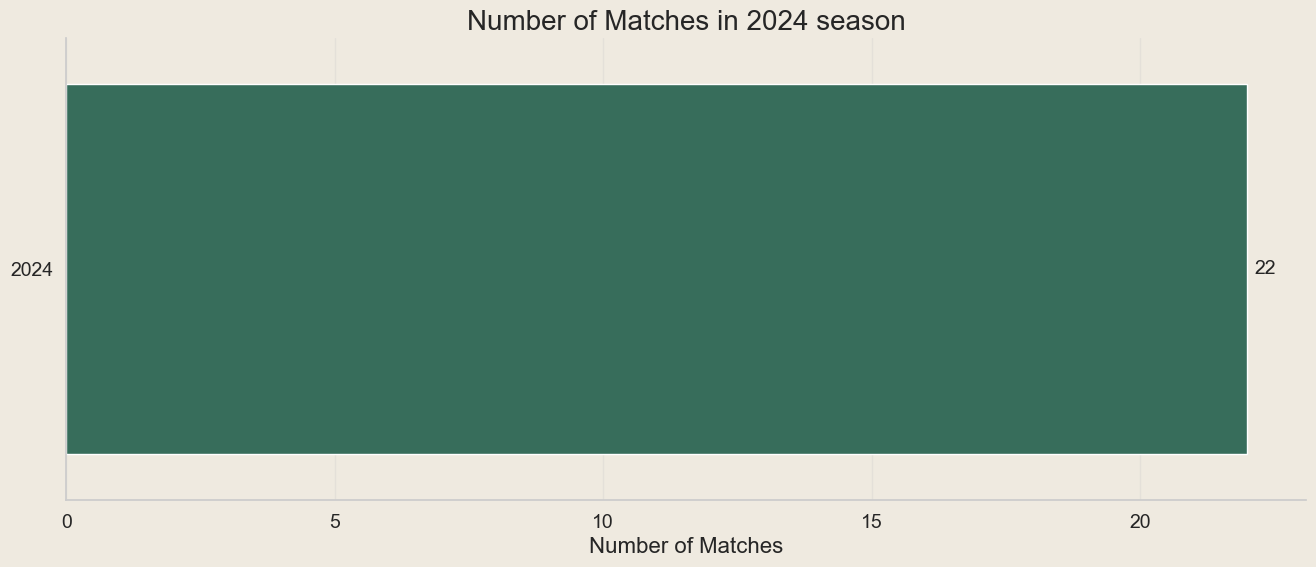

In [7]:
fig = plt.figure(figsize=(16, 6))

matches_per_season = deliveries_df.groupby('season')['match_id'].nunique()

ax = sns.barplot(y=matches_per_season.index, x=matches_per_season.values, palette = colors, orient= 'h')
ax.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge', fontsize = 14, padding =5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Matches', fontsize=16)
plt.ylabel(None)
plt.title('Number of Matches in 2024 season', fontsize=20)
plt.show()

Result Analysis:

In [8]:
batting_first = result_df[result_df['toss_decision'] == 'bat'].shape[0]
bowling_first = result_df[result_df['toss_decision'] == 'field'].shape[0]
print(f"\033[92mMatches where team batting decided to bat first: {batting_first}, {round(batting_first/result_df.shape[0]*100, 2)}%")
print(f"\033[92mMatches where team bowling decided to bowl first: {bowling_first}, {round(bowling_first/result_df.shape[0]*100, 2)}%")

matches_won_batting_first = result_df[~result_df['winner_runs'].isna()].shape[0]
matches_won_batting_second = result_df[~result_df['winner_wickets'].isna()].shape[0]
print(f"\033[92mMatches won batting first: {matches_won_batting_first}, {round(matches_won_batting_first/result_df.shape[0]*100, 2)}%")
print(f"\033[92mMatches won batting second: {matches_won_batting_second}, {round(matches_won_batting_second/result_df.shape[0]*100, 2)}%")

toss_winner_won = result_df[result_df['toss_winner'] == result_df['winner']].shape[0]
toss_loser_won = result_df[result_df['toss_winner'] != result_df['winner']].shape[0]
print(f"\033[92mMatches won by the team winning the toss: {toss_winner_won}, {round(toss_winner_won/result_df.shape[0]*100, 2)}%")
print(f"\033[92mMatches won by the team losing the toss: {toss_loser_won}, {round(toss_loser_won/result_df.shape[0]*100, 2)}%")

first_innings = deliveries_df[deliveries_df['innings'] == 1]
second_innings = deliveries_df[deliveries_df['innings'] == 2]

runs_scored_in_first_innings = first_innings['runs_off_bat'].sum() + first_innings['extras'].sum()
balls_faced_in_first_innings = first_innings.shape[0]
wickets_lost_in_first_innings = first_innings[~first_innings['player_dismissed'].isna()].shape[0]
print(f"\033[92mRuns scored in first innings: {runs_scored_in_first_innings} for {wickets_lost_in_first_innings} with {round(runs_scored_in_first_innings/balls_faced_in_first_innings, 2) * 100} strike rate and {round(runs_scored_in_first_innings/wickets_lost_in_first_innings, 2)} average")

runs_scored_in_second_innings = second_innings['runs_off_bat'].sum() + second_innings['extras'].sum()
balls_faced_in_second_innings = second_innings.shape[0]
wicktes_lost_in_second_innings = second_innings[~second_innings['player_dismissed'].isna()].shape[0]
print(f"\033[92mRuns scored in second innings: {runs_scored_in_second_innings} for {wicktes_lost_in_second_innings} with {round(runs_scored_in_second_innings/balls_faced_in_second_innings, 2) * 100} strike rate and {round(runs_scored_in_second_innings/wicktes_lost_in_second_innings, 2)} average")

Matches where team batting decided to bat first: 9, 40.91%
Matches where team bowling decided to bowl first: 13, 59.09%
Matches won batting first: 11, 50.0%
Matches won batting second: 11, 50.0%
Matches won by the team winning the toss: 14, 63.64%
Matches won by the team losing the toss: 8, 36.36%
Runs scored in first innings: 3368 for 147 with 125.0 strike rate and 22.91 average
Runs scored in second innings: 3213 for 120 with 130.0 strike rate and 26.78 average


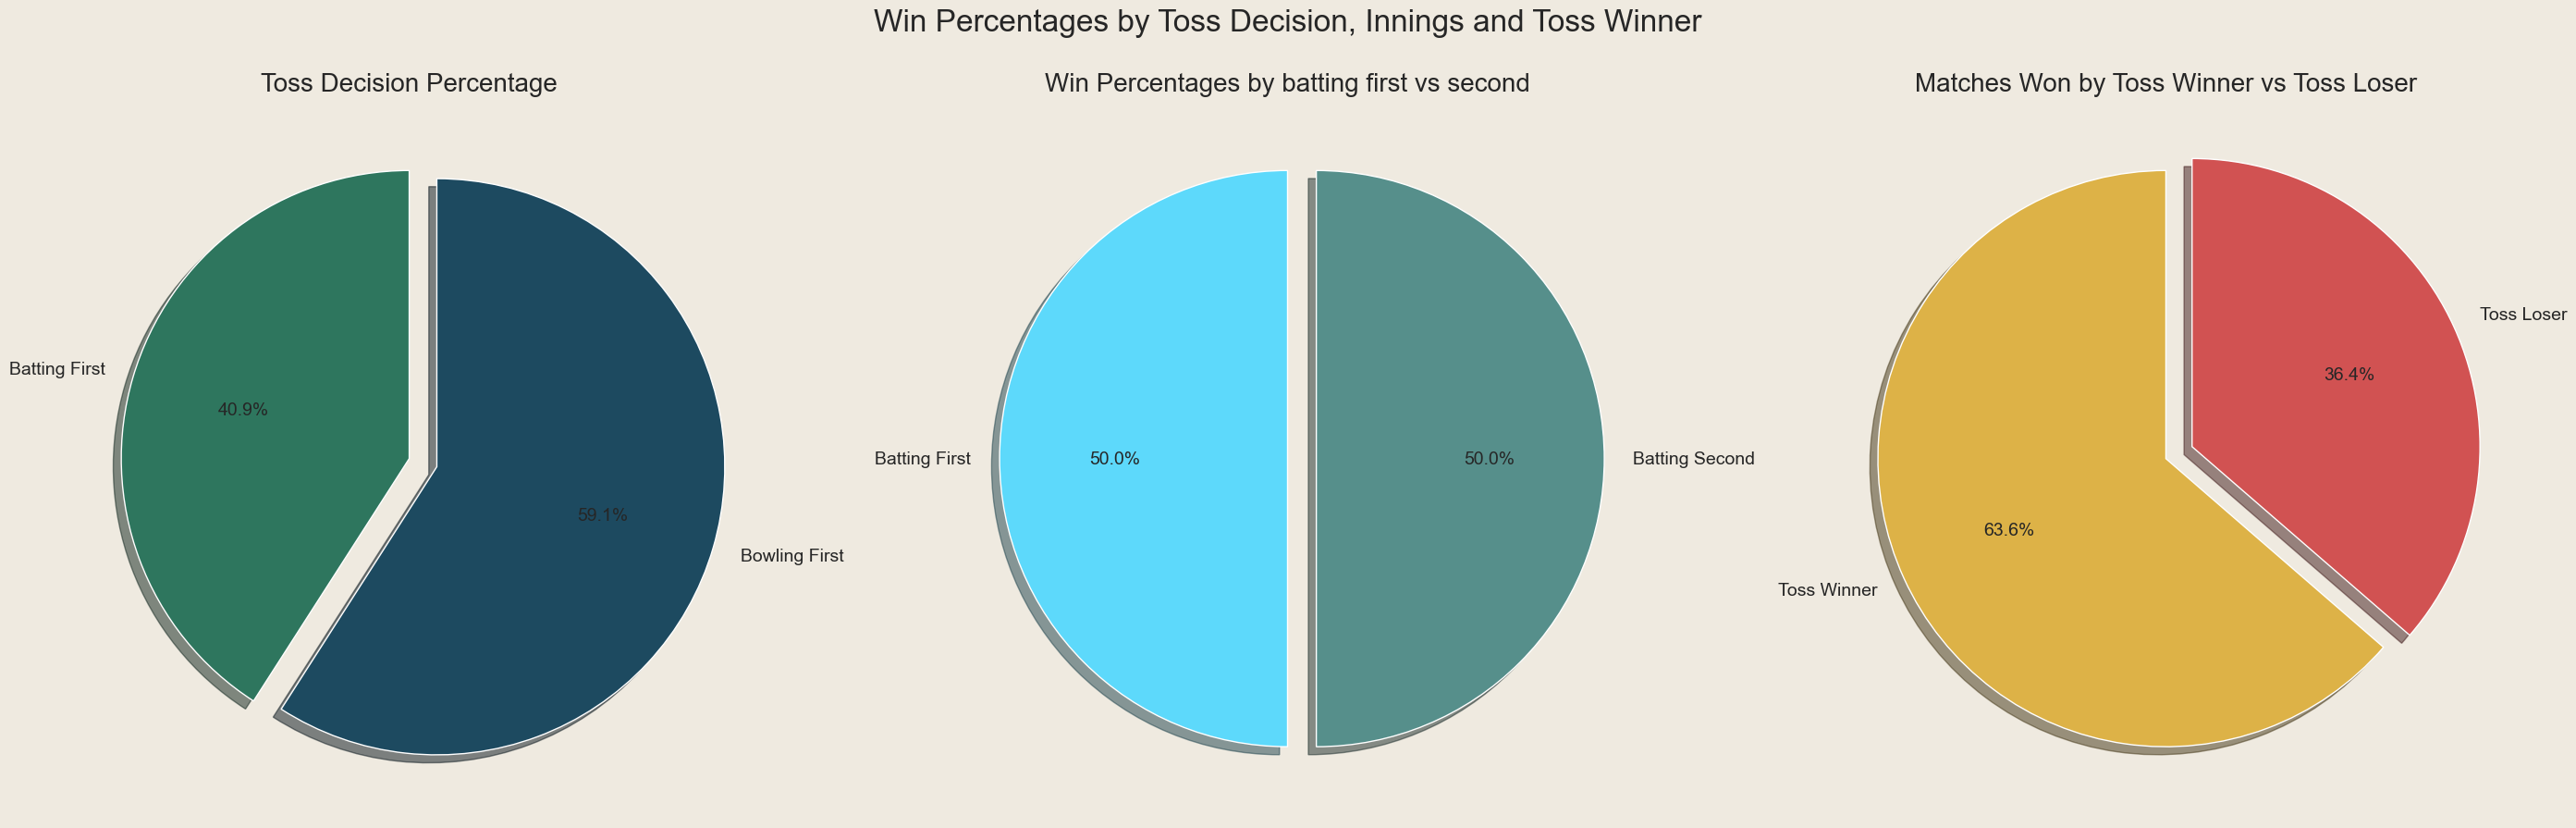

In [9]:
fig, ax = plt.subplots(figsize=(28, 10), ncols=3, nrows=1)

toss_decision_percentages = [
    round(batting_first/result_df.shape[0]*100, 2),
    round(bowling_first/result_df.shape[0]*100, 2)
]
explode =[0.0, 0.1]
ax[0].pie(toss_decision_percentages, labels=['Batting First', 'Bowling First'], autopct='%1.1f%%', colors=colors, shadow=True, textprops={'fontsize': 14}, startangle=90, explode=explode)
ax[0].set_title('Toss Decision Percentage', fontsize=20)

win_percentages_by_innings = [
    round(matches_won_batting_first/result_df.shape[0]*100, 2),
    round(matches_won_batting_second/result_df.shape[0]*100, 2)
]
explode =[0.0, 0.1]
ax[1].pie(win_percentages_by_innings, labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', colors=colors[2:], shadow=True, textprops={'fontsize': 14}, startangle=90, explode=explode)
ax[1].set_title('Win Percentages by batting first vs second', fontsize=20)

win_percentages_by_toss_winner_and_losser = [
    round(toss_winner_won/result_df.shape[0]*100, 2),
    round(toss_loser_won/result_df.shape[0]*100, 2)
]
explode =[0.0, 0.1]
ax[2].pie(win_percentages_by_toss_winner_and_losser, labels=['Toss Winner', 'Toss Loser'], autopct='%1.1f%%', colors=colors[7:], shadow=True, textprops={'fontsize': 14}, startangle=90, explode=explode)
ax[2].set_title('Matches Won by Toss Winner vs Toss Loser', fontsize=20)

plt.suptitle("Win Percentages by Toss Decision, Innings and Toss Winner", fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.98)
plt.show()

C:\Users\shres\AppData\Local\Temp\ipykernel_2152\3269870777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['First Innings', 'Second Innings'], x=runs_scored, palette=colors[5:], ax=ax[0, 0])
C:\Users\shres\AppData\Local\Temp\ipykernel_2152\3269870777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['First Innings', 'Second Innings'], x=wickets_lost, palette=colors[5:], ax=ax[0, 1])
C:\Users\shres\AppData\Local\Temp\ipykernel_2152\3269870777.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['First Innings', 'Second Inning

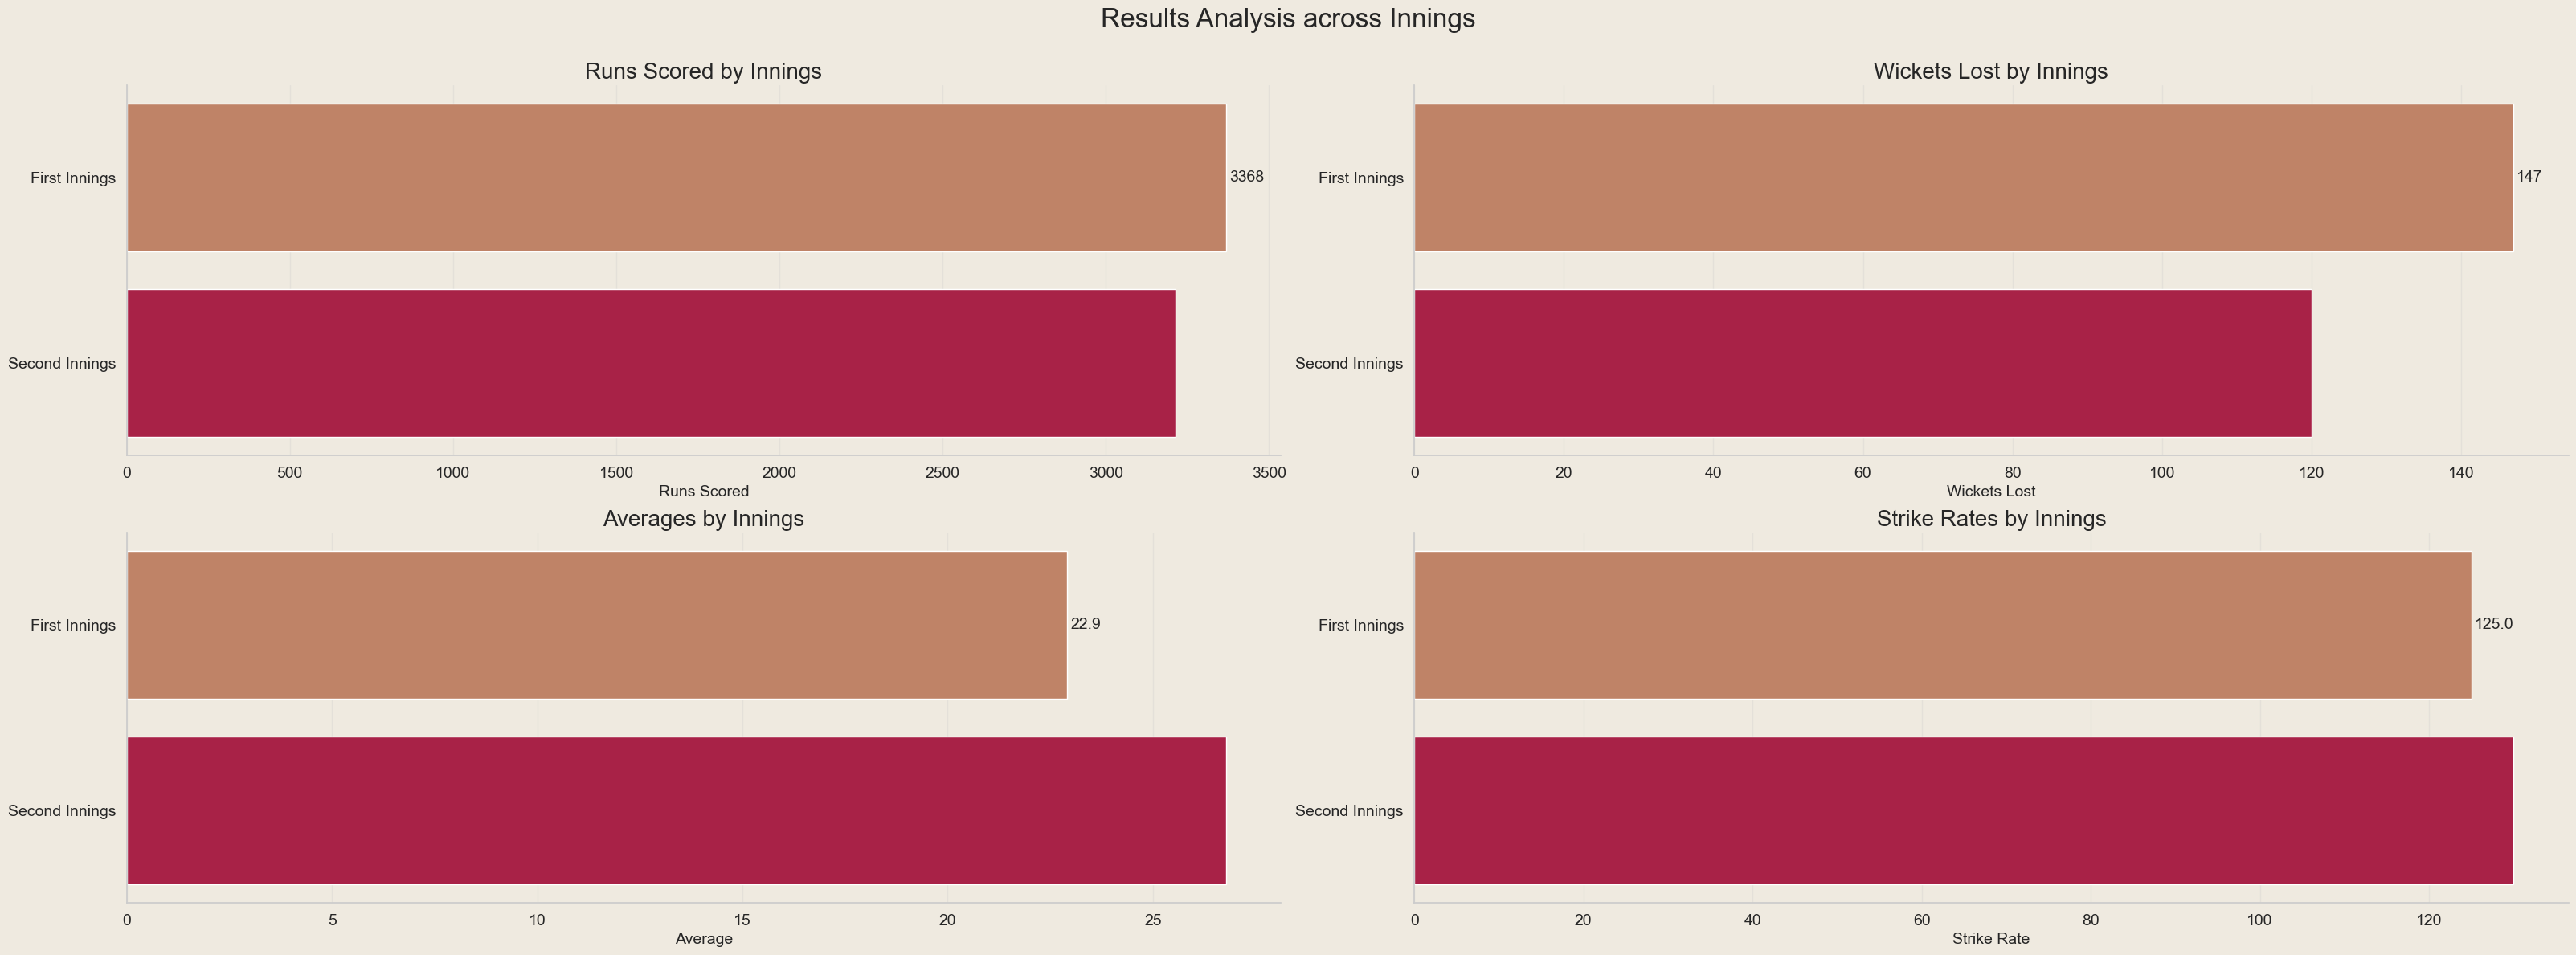

In [10]:
fig, ax = plt.subplots(figsize=(32, 12), ncols=2, nrows=2)

runs_scored = [runs_scored_in_first_innings, runs_scored_in_second_innings]
sns.barplot(y=['First Innings', 'Second Innings'], x=runs_scored, palette=colors[5:], ax=ax[0, 0])
ax[0, 0].set_title('Runs Scored by Innings', fontsize=20)
ax[0, 0].set_xlabel('Runs Scored', fontsize=14)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis='x', labelsize=14)
ax[0, 0].tick_params(axis='y', labelsize=14)
ax[0, 0].bar_label(ax[0, 0].containers[0], fmt='%d', fontsize=14, padding=3)

wickets_lost = [wickets_lost_in_first_innings, wicktes_lost_in_second_innings]
sns.barplot(y=['First Innings', 'Second Innings'], x=wickets_lost, palette=colors[5:], ax=ax[0, 1])
ax[0, 1].set_title('Wickets Lost by Innings', fontsize=20)
ax[0, 1].set_xlabel('Wickets Lost', fontsize=14)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis='x', labelsize=14)
ax[0, 1].tick_params(axis='y', labelsize=14)
ax[0, 1].bar_label(ax[0, 1].containers[0], fmt='%d', fontsize=14, padding=3)

averages = [round(runs_scored_in_first_innings/wickets_lost_in_first_innings, 2), round(runs_scored_in_second_innings/wicktes_lost_in_second_innings, 2)]
sns.barplot(y=['First Innings', 'Second Innings'], x=averages, palette=colors[5:], ax=ax[1, 0])
ax[1, 0].set_title('Averages by Innings', fontsize=20)
ax[1, 0].set_xlabel('Average', fontsize=14)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis='x', labelsize=14)
ax[1, 0].tick_params(axis='y', labelsize=14)
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt='%1.1f', fontsize=14, padding=3)

strike_rates = [round(runs_scored_in_first_innings/balls_faced_in_first_innings, 2) * 100, round(runs_scored_in_second_innings/balls_faced_in_second_innings, 2) * 100]
sns.barplot(y=['First Innings', 'Second Innings'], x=strike_rates, palette=colors[5:], ax=ax[1, 1])
ax[1, 1].set_title('Strike Rates by Innings', fontsize=20)
ax[1, 1].set_xlabel('Strike Rate', fontsize=14)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis='x', labelsize=14)
ax[1, 1].tick_params(axis='y', labelsize=14)
ax[1, 1].bar_label(ax[1, 1].containers[0], fmt='%1.1f', fontsize=14, padding=3)

plt.suptitle('Results Analysis across Innings', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()

by venues

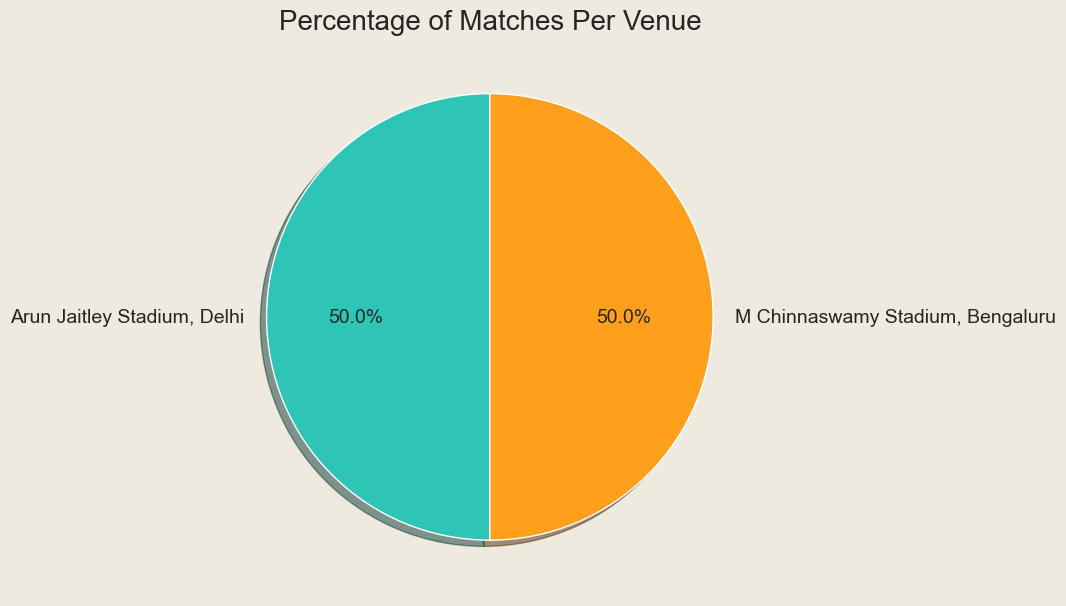

In [11]:
total_matches = deliveries_df['match_id'].nunique()

matches_per_venue = deliveries_df.groupby(['venue'])['match_id'].nunique().sort_values(ascending=False).reset_index()
matches_per_venue.rename(columns={'match_id': 'matches'}, inplace=True)
matches_per_venue['percentage'] = matches_per_venue['matches'].apply(lambda x: round((x/total_matches)*100, 2)).round(2)
matches_per_venue['percentage_label'] = matches_per_venue['percentage'].apply(lambda x: f'{x}%')

fig, ax = plt.subplots(figsize=(24, 6))

ax.pie(matches_per_venue['matches'], labels=matches_per_venue['venue'], autopct='%1.1f%%', colors=colors[15:], shadow=True, textprops={'fontsize': 14}, startangle=90)
plt.title('Percentage of Matches Per Venue', fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


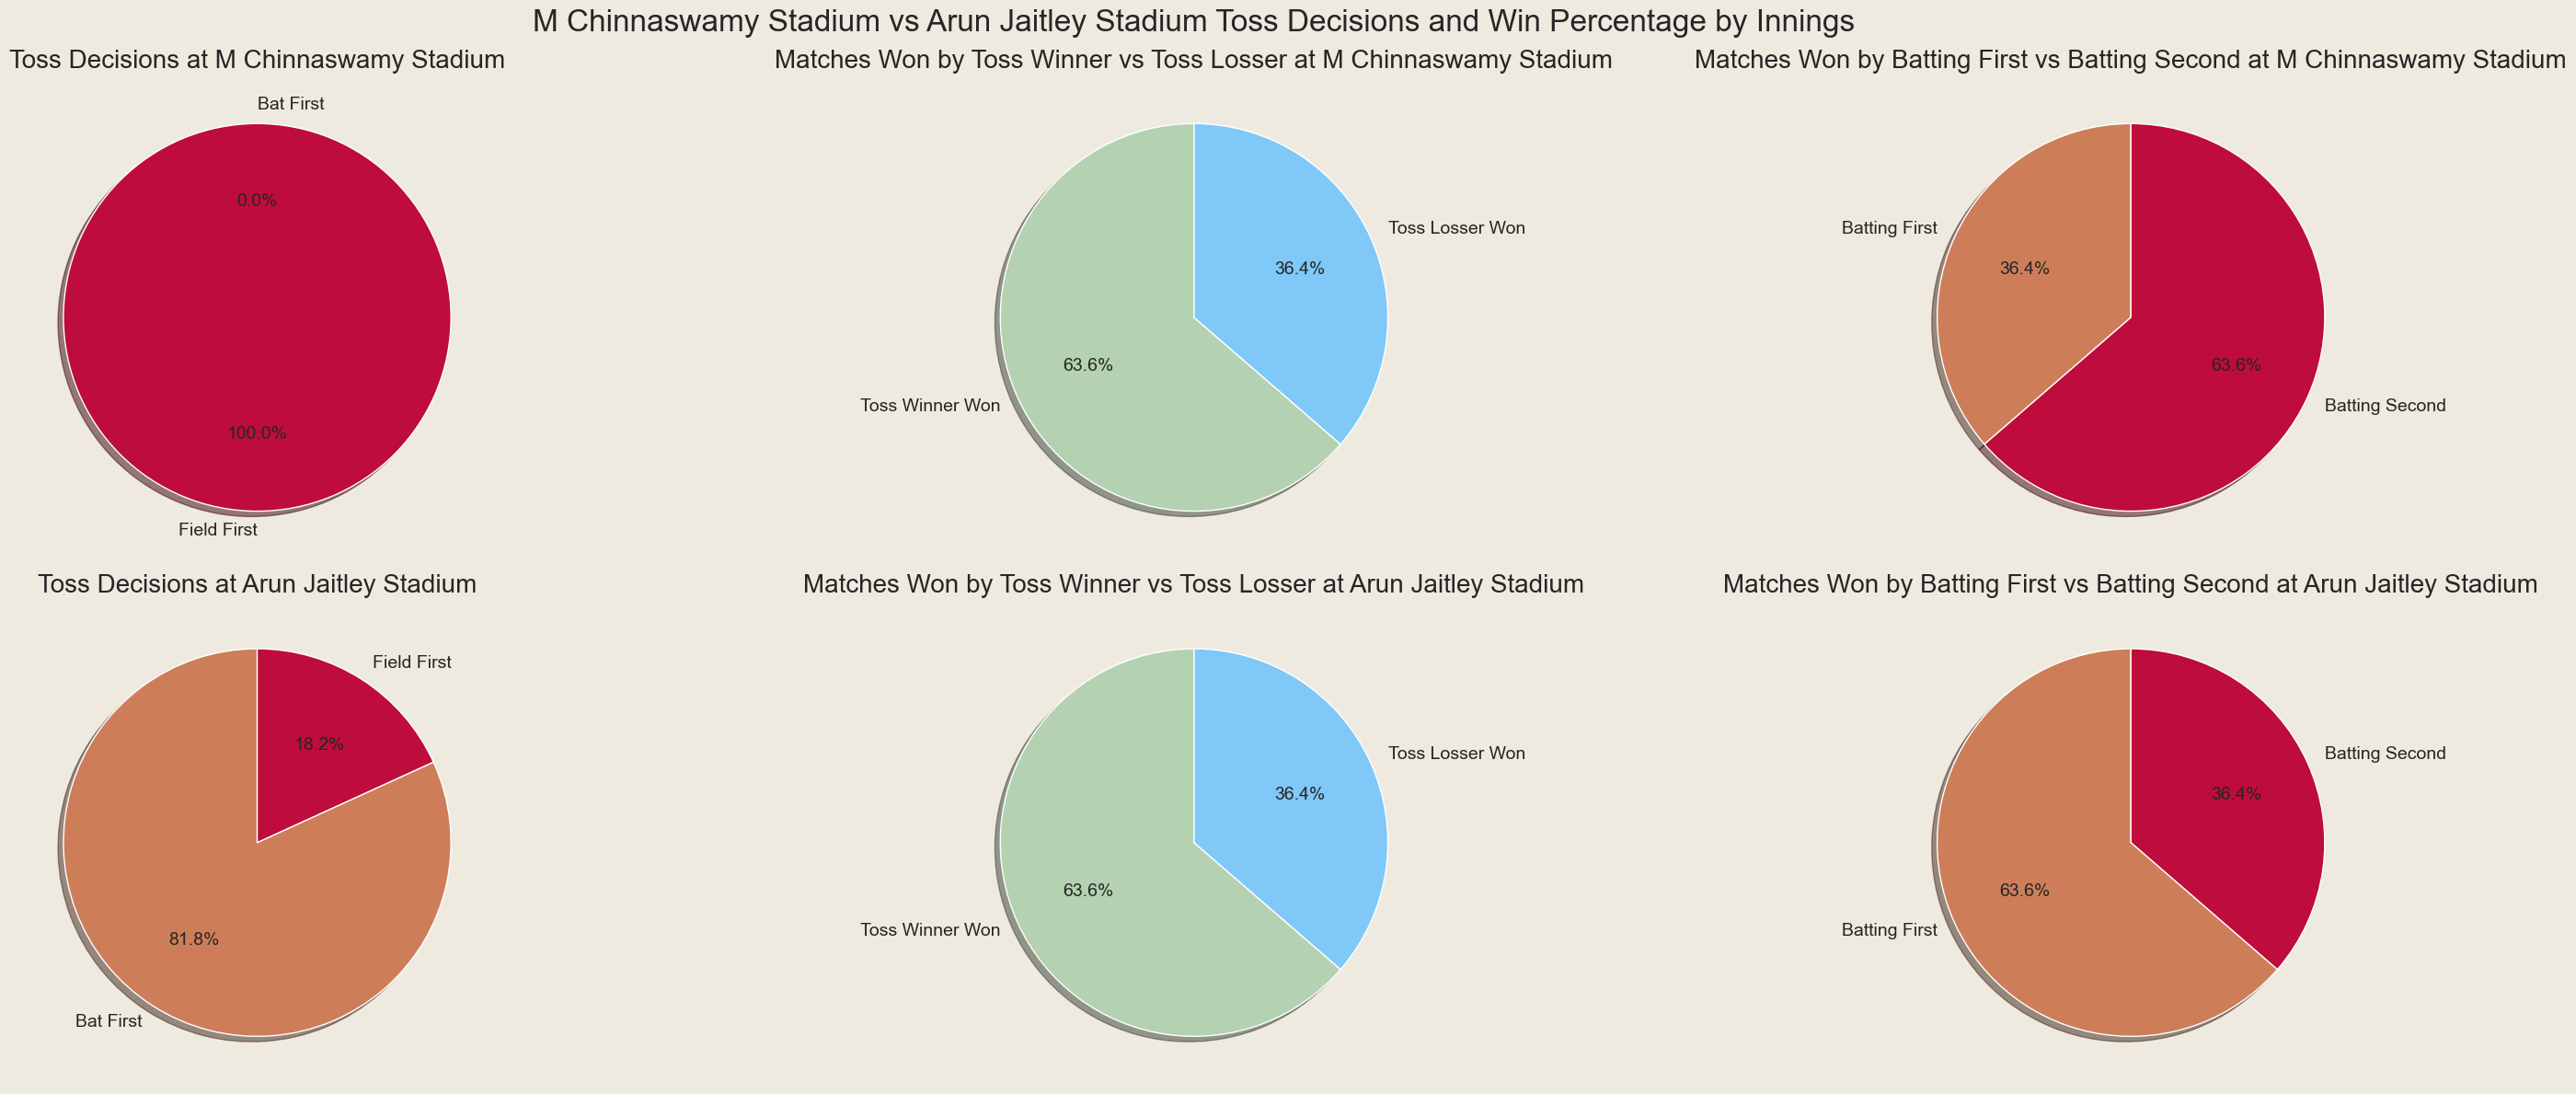

In [12]:
def venue_level_analysis(venue):
    stadium, city = venue.split(', ')
    venue_matches = result_df[result_df['venue'] == stadium]
    scores_per_venue = deliveries_df[deliveries_df['venue'] == venue]
    total_runs_for_venue = scores_per_venue['runs_off_bat'].sum() + scores_per_venue['extras'].sum()
    total_deliveries_for_venue = scores_per_venue.shape[0]
    total_runs_first_innings = scores_per_venue[scores_per_venue['innings'] == 1]['runs_off_bat'].sum() + scores_per_venue[scores_per_venue['innings'] == 1]['extras'].sum()
    total_wickets_first_innings = scores_per_venue[(scores_per_venue['innings'] == 1) & (~scores_per_venue['player_dismissed'].isna())].shape[0]
    total_balls_first_innings = scores_per_venue[scores_per_venue['innings'] == 1].shape[0]
    total_runs_second_innings = scores_per_venue[scores_per_venue['innings'] == 2]['runs_off_bat'].sum() + scores_per_venue[scores_per_venue['innings'] == 2]['extras'].sum()
    total_wickets_second_innings = scores_per_venue[(scores_per_venue['innings'] == 2) & (~scores_per_venue['player_dismissed'].isna())].shape[0]
    total_balls_second_innings = scores_per_venue[scores_per_venue['innings'] == 2].shape[0]
    matches_won_batting_first = venue_matches[(venue_matches['winner_runs'] > 0)].shape[0]
    matches_won_batting_second = venue_matches[(venue_matches['winner_wickets'] > 0)].shape[0]
    toss_winner_chosen_to_bat = venue_matches[(venue_matches['toss_decision'] == 'bat')].shape[0]
    toss_winner_chosen_to_field = venue_matches[(venue_matches['toss_decision'] == 'field')].shape[0]
    toss_winner_won = venue_matches[(venue_matches['toss_winner'] == venue_matches['winner'])].shape[0]
    toss_loser_won = venue_matches[(venue_matches['toss_winner'] != venue_matches['winner'])].shape[0]
    total_runs = deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()
    wickets = scores_per_venue[~scores_per_venue['player_dismissed'].isna()].shape[0]

    stats = {
        'toss_decisions': [round(toss_winner_chosen_to_bat/venue_matches.shape[0]*100, 2), round(toss_winner_chosen_to_field/venue_matches.shape[0]*100, 2)],
        'matches_won_by_toss_winner': [round(toss_winner_won/venue_matches.shape[0]*100, 2), round(toss_loser_won/venue_matches.shape[0]*100, 2)],
        'win_percentage_by_innings': [round(matches_won_batting_first/venue_matches.shape[0]*100, 2), round(matches_won_batting_second/venue_matches.shape[0]*100, 2)],
        'total_runs_for_venue': total_runs_for_venue,
        'runs_per_match': round(total_runs_for_venue/venue_matches.shape[0], 2),
        'wickets_for_venue': wickets,
        'runs_scored_by_innings': [total_runs_first_innings, total_runs_second_innings],
        'wickets_by_innings': [total_wickets_first_innings, total_wickets_second_innings],
        "average_by_innings": [round(total_runs_first_innings/total_wickets_first_innings, 2), round(total_runs_second_innings/total_wickets_second_innings, 2)],
        'strike_rate_by_innings': [round(total_runs_first_innings/total_balls_first_innings, 2) * 100, round(total_runs_second_innings/total_balls_second_innings, 2) * 100],
        
    }
    return stats

chinnaswamy_stats = venue_level_analysis('M Chinnaswamy Stadium, Bengaluru')
arun_jaitley_stats = venue_level_analysis('Arun Jaitley Stadium, Delhi')

fig, ax = plt.subplots(2, 3, figsize=(32, 12))

ax[0, 0].pie(chinnaswamy_stats['toss_decisions'], labels=['Bat First', 'Field First'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 0].set_title('Toss Decisions at M Chinnaswamy Stadium', fontsize=20)

ax[1, 0].pie(arun_jaitley_stats['toss_decisions'], labels=['Bat First', 'Field First'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[1, 0].set_title('Toss Decisions at Arun Jaitley Stadium', fontsize=20)

ax[0, 1].pie(chinnaswamy_stats['matches_won_by_toss_winner'], labels=['Toss Winner Won', 'Toss Losser Won'], autopct='%1.1f%%', colors=colors[9:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 1].set_title('Matches Won by Toss Winner vs Toss Losser at M Chinnaswamy Stadium', fontsize=20)

ax[1, 1].pie(arun_jaitley_stats['matches_won_by_toss_winner'], labels=['Toss Winner Won', 'Toss Losser Won'], autopct='%1.1f%%', colors=colors[9:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[1, 1].set_title('Matches Won by Toss Winner vs Toss Losser at Arun Jaitley Stadium', fontsize=20)

ax[0, 2].pie(chinnaswamy_stats['win_percentage_by_innings'], labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 2].set_title('Matches Won by Batting First vs Batting Second at M Chinnaswamy Stadium', fontsize=20)

ax[1, 2].pie(arun_jaitley_stats['win_percentage_by_innings'], labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[1, 2].set_title('Matches Won by Batting First vs Batting Second at Arun Jaitley Stadium', fontsize=20)


plt.suptitle('M Chinnaswamy Stadium vs Arun Jaitley Stadium Toss Decisions and Win Percentage by Innings', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.92)
plt.show()

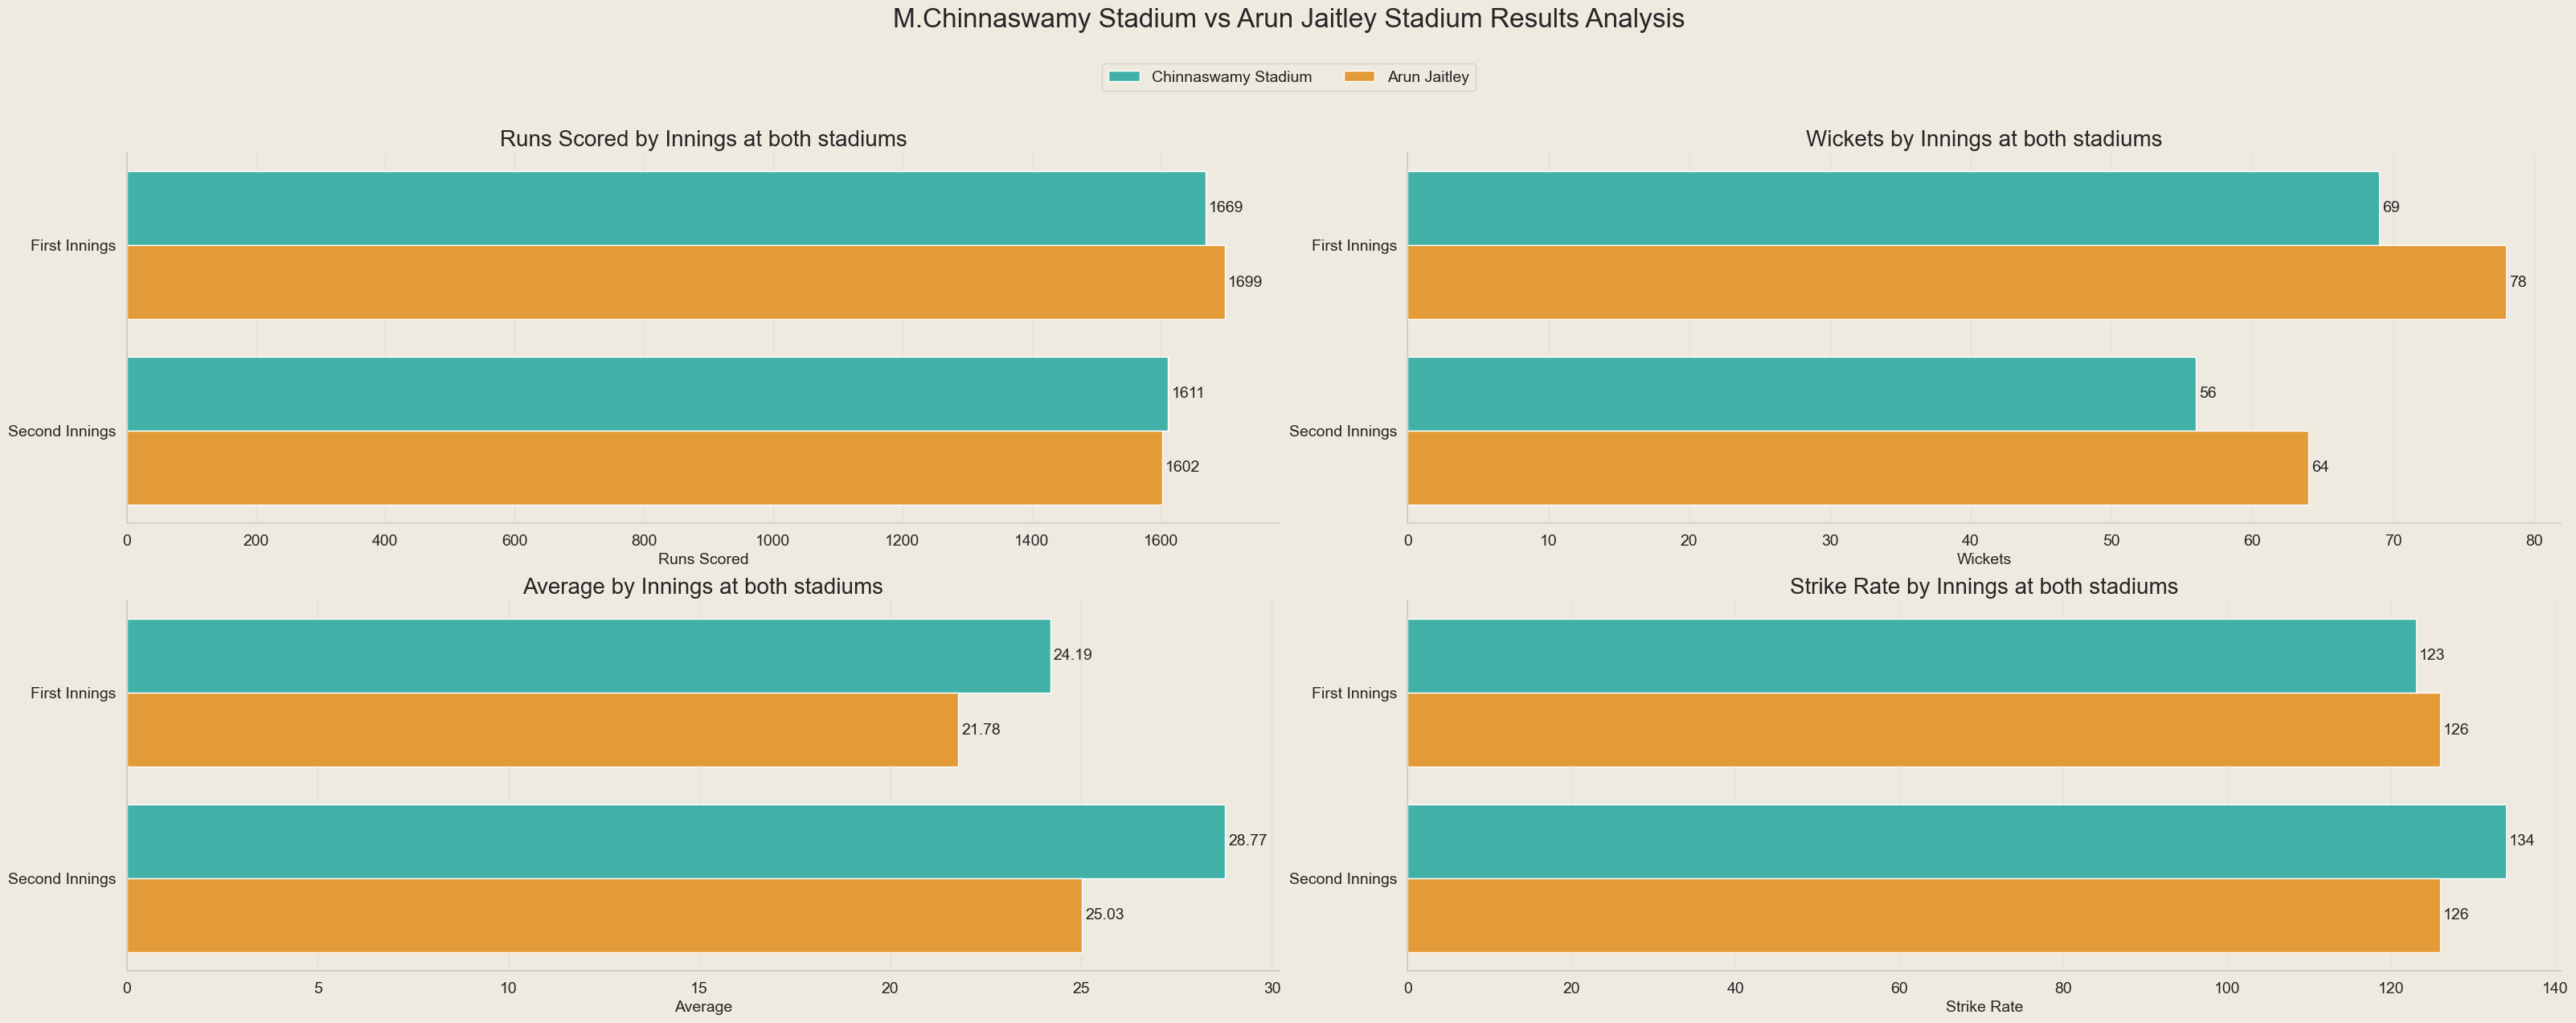

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(32, 12))

data = [
    {'innings': 'First Innings', 'runs_scored': chinnaswamy_stats['runs_scored_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'runs_scored': chinnaswamy_stats['runs_scored_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'runs_scored': arun_jaitley_stats['runs_scored_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'runs_scored': arun_jaitley_stats['runs_scored_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
runs_scored_df = pd.DataFrame(data)
sns.barplot(
    x=runs_scored_df['runs_scored'], y=runs_scored_df['innings'], hue=runs_scored_df['stadium'], palette=colors[15:], ax=ax[0, 0]
)
ax[0, 0].set_title('Runs Scored by Innings at both stadiums', fontsize=20)
ax[0, 0].set_xlabel('Runs Scored', fontsize=14)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis='x', labelsize=14)
ax[0, 0].tick_params(axis='y', labelsize=14)
ax[0, 0].bar_label(ax[0, 0].containers[0], fontsize=14, padding=3)
ax[0, 0].bar_label(ax[0, 0].containers[1], fontsize=14, padding=3)

data = [
    {'innings': 'First Innings', 'wickets': chinnaswamy_stats['wickets_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'wickets': chinnaswamy_stats['wickets_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'wickets': arun_jaitley_stats['wickets_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'wickets': arun_jaitley_stats['wickets_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
wickets_df = pd.DataFrame(data)
sns.barplot(
    x=wickets_df['wickets'], y=wickets_df['innings'], hue=wickets_df['stadium'], palette=colors[15:], ax=ax[0, 1]
)
ax[0, 1].set_title('Wickets by Innings at both stadiums', fontsize=20)
ax[0, 1].set_xlabel('Wickets', fontsize=14)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis='x', labelsize=14)
ax[0, 1].tick_params(axis='y', labelsize=14)
ax[0, 1].bar_label(ax[0, 1].containers[0], fontsize=14, padding=3)
ax[0, 1].bar_label(ax[0, 1].containers[1], fontsize=14, padding=3)

data = [
    {'innings': 'First Innings', 'average': chinnaswamy_stats['average_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'average': chinnaswamy_stats['average_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'average': arun_jaitley_stats['average_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'average': arun_jaitley_stats['average_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
average_df = pd.DataFrame(data)
sns.barplot(
    x=average_df['average'], y=average_df['innings'], hue=average_df['stadium'], palette=colors[15:], ax=ax[1, 0]
)
ax[1, 0].set_title('Average by Innings at both stadiums', fontsize=20)
ax[1, 0].set_xlabel('Average', fontsize=14)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis='x', labelsize=14)
ax[1, 0].tick_params(axis='y', labelsize=14)
ax[1, 0].bar_label(ax[1, 0].containers[0], fontsize=14, padding=3)
ax[1, 0].bar_label(ax[1, 0].containers[1], fontsize=14, padding=3)

data = [
    {'innings': 'First Innings', 'strike_rate': chinnaswamy_stats['strike_rate_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'strike_rate': chinnaswamy_stats['strike_rate_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'strike_rate': arun_jaitley_stats['strike_rate_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'strike_rate': arun_jaitley_stats['strike_rate_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
strike_rate_df = pd.DataFrame(data)
sns.barplot(
    x=strike_rate_df['strike_rate'], y=strike_rate_df['innings'], hue=strike_rate_df['stadium'], palette=colors[15:], ax=ax[1, 1]
)
ax[1, 1].set_title('Strike Rate by Innings at both stadiums', fontsize=20)
ax[1, 1].set_xlabel('Strike Rate', fontsize=14)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis='x', labelsize=14)
ax[1, 1].tick_params(axis='y', labelsize=14)
ax[1, 1].bar_label(ax[1, 1].containers[0], fontsize=14, padding=3)
ax[1, 1].bar_label(ax[1, 1].containers[1], fontsize=14, padding=3)

handles, labels = [], []
for plot_ax in [ax[0, 0], ax[0, 1], ax[1, 0],  ax[1, 1]]:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
fig.legend(
    handles[:2], labels[:2], loc='upper center', bbox_to_anchor=(.5, 1), ncol=5, fontsize=14
)

plt.suptitle('M.Chinnaswamy Stadium vs Arun Jaitley Stadium Results Analysis', fontsize=24, y=1.05)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()